In [3]:
import pandas as pd
df_cleaned= pd.read_csv(r'C:\Users\Yibabe\Desktop\10academyAIMweek-4\data\cleaned_merge.csv')

C:\Users\Yibabe\AppData\Local\Temp\ipykernel_1516\3559807156.py:2: DtypeWarning: Columns (7,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned= pd.read_csv(r'C:\Users\Yibabe\Desktop\10academyAIMweek-4\data\cleaned_merge.csv')


In [4]:
df_cleaned.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,CompetitionOpenTime,BeforeHoliday,AfterHoliday,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,22.0,2012.0,NoPromo,7,2015,82.0,0,0,AfterHoliday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,2015,92.0,0,0,NormalDay
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,103.0,0,0,NormalDay
3,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0,22.0,2012.0,NoPromo,7,2015,19.0,0,0,NormalDay
4,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0,22.0,2012.0,NoPromo,7,2015,9.0,0,0,NormalDay


In [ ]:
●to Check & compare sales behavior before, during, and after holidays
Identify Holiday Periods The column StateHoliday should indicate whether a date is during a public holiday. You might also want to create new columns that indicate whether a date is before or after a holiday.

Before Holiday: Create a column to identify days just before holidays (e.g., the day before a holiday).
During Holiday: Use the StateHoliday column.
After Holiday: Create a column to identify days immediately following holidays.

In [5]:
# Mark days as 'Before Holiday', 'During Holiday', 'After Holiday'
df_cleaned['BeforeHoliday'] = df_cleaned['StateHoliday'].shift(-1).fillna(0)  # Previous day is a holiday
df_cleaned['AfterHoliday'] = df_cleaned['StateHoliday'].shift(1).fillna(0)  # Next day is a holiday


In [ ]:
Group by Holiday Periods You can now group your data by these periods (BeforeHoliday, DuringHoliday, AfterHoliday) and calculate the average sales for each period.

In [6]:
# Create a new column to define the period
df_cleaned['HolidayPeriod'] = 'NormalDay'
df_cleaned.loc[df_cleaned['StateHoliday'] != '0', 'HolidayPeriod'] = 'DuringHoliday'
df_cleaned.loc[df_cleaned['BeforeHoliday'] != '0', 'HolidayPeriod'] = 'BeforeHoliday'
df_cleaned.loc[df_cleaned['AfterHoliday'] != '0', 'HolidayPeriod'] = 'AfterHoliday'


In [7]:
sales_by_period = df_cleaned.groupby('HolidayPeriod')['Sales'].mean()
print(sales_by_period)


HolidayPeriod
AfterHoliday     4981.517615
BeforeHoliday    3870.075938
DuringHoliday     155.109535
NormalDay        5598.966845
Name: Sales, dtype: float64


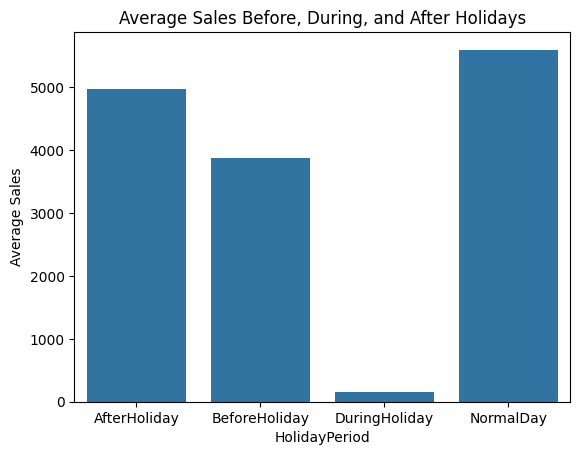

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=sales_by_period.index, y=sales_by_period.values)
plt.title('Average Sales Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
●Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

Create Holiday Flags
Once you have a list of holiday dates, create a new column in your dataset that indicates whether each day is near or on one of these holidays

In [13]:
import pandas as pd

# List of Christmas dates (you can add more holidays to this list)
holiday_dates = ['2013-12-25', '2014-12-25', '2015-12-25']  # Add dates for your dataset years
holiday_names = ['Christmas'] * len(holiday_dates)

# Convert to DataFrame
holidays_df = pd.DataFrame({'Date': holiday_dates, 'Holiday': holiday_names})
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

# Merge holidays into your main DataFrame
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df = df_cleaned.merge(holidays_df, how='left', on='Date')

# Fill NaN values with 'No Holiday' for days that are not holidays
df['Holiday'].fillna('No Holiday', inplace=True)

# If you want to flag a range around holidays (e.g., 7 days before/after)
df['HolidayPeriod'] = df['Date'].apply(
    lambda x: 'Christmas' if pd.to_datetime('2015-12-18') <= x <= pd.to_datetime('2015-12-31') else 'No Holiday'
)


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_1516\1370753436.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Holiday'].fillna('No Holiday', inplace=True)


In [16]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,CompetitionOpenTime,BeforeHoliday,AfterHoliday,HolidayPeriod,Holiday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,22.0,2012.0,NoPromo,7,2015,82.0,0,0,No Holiday,No Holiday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",7,2015,92.0,0,0,No Holiday,No Holiday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,103.0,0,0,No Holiday,No Holiday
3,6,5,2015-07-31,5651,589,1,1,0,1,a,...,22.0,2012.0,NoPromo,7,2015,19.0,0,0,No Holiday,No Holiday
4,8,5,2015-07-31,8492,833,1,1,0,1,a,...,22.0,2012.0,NoPromo,7,2015,9.0,0,0,No Holiday,No Holiday


In [ ]:
Group by Holiday or Non-Holiday Periods

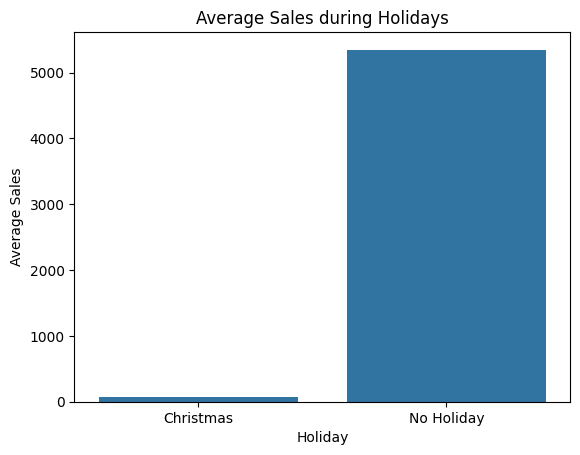

In [17]:
# Group by Holiday Period and calculate average sales
holiday_sales = df.groupby('Holiday')['Sales'].mean().reset_index()

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Holiday', y='Sales', data=holiday_sales)
plt.title('Average Sales during Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
Analyze Sales Trends Before, During, and After Holidays

# Create periods for analysis: Before, During, After Holidays
df['HolidayPeriod'] = df.apply(
    lambda row: 'BeforeHoliday' if (row['Date'] < pd.to_datetime('2015-12-25') and row['Date'] >= pd.to_datetime('2015-12-18')) 
    else ('DuringHoliday' if row['Date'] == pd.to_datetime('2015-12-25') 
    else ('AfterHoliday' if (row['Date'] > pd.to_datetime('2015-12-25') and row['Date'] <= pd.to_datetime('2015-12-31')) 
    else 'NormalDay')), axis=1
)

# Group by Holiday Period
holiday_period_sales = df.groupby('HolidayPeriod')['Sales'].mean().reset_index()

# Plot the results
sns.barplot(x='HolidayPeriod', y='Sales', data=holiday_period_sales)
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()


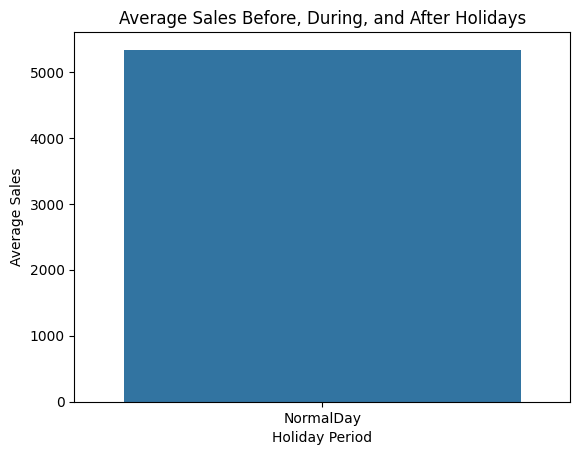

In [18]:
# Create periods for analysis: Before, During, After Holidays
df['HolidayPeriod'] = df.apply(
    lambda row: 'BeforeHoliday' if (row['Date'] < pd.to_datetime('2015-12-25') and row['Date'] >= pd.to_datetime('2015-12-18')) 
    else ('DuringHoliday' if row['Date'] == pd.to_datetime('2015-12-25') 
    else ('AfterHoliday' if (row['Date'] > pd.to_datetime('2015-12-25') and row['Date'] <= pd.to_datetime('2015-12-31')) 
    else 'NormalDay')), axis=1
)

# Group by Holiday Period
holiday_period_sales = df.groupby('HolidayPeriod')['Sales'].mean().reset_index()

# Plot the results
sns.barplot(x='HolidayPeriod', y='Sales', data=holiday_period_sales)
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()
